In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import roc_auc_score



In [2]:
df = pd.read_csv('heart_disease_uci.csv')  
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:

print(df.isnull().sum())


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


In [5]:
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [7]:
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [10]:
cat_cols = ['restecg', 'slope','fbs', 'exang']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


C:\Users\MOD\AppData\Local\Temp\ipykernel_12544\593890092.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [13]:

print("Shape of dataset:", df.shape)

print(df.head())

print(df.info())

print(df.describe(include='all'))

print(df.isnull().sum())




Shape of dataset: (920, 14)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope  num  
0  lv hypertrophy   150.0  False      2.3  downsloping    0  
1  lv hypertrophy   108.0   True      1.5         flat    2  
2  lv hypertrophy   129.0   True      2.6         flat    1  
3          normal   187.0  False      3.5  downsloping    0  
4  lv hypertrophy   172.0  False      1.4    upsloping    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------

C:\Users\MOD\AppData\Local\Temp\ipykernel_12544\3336196419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num', palette='Set2')


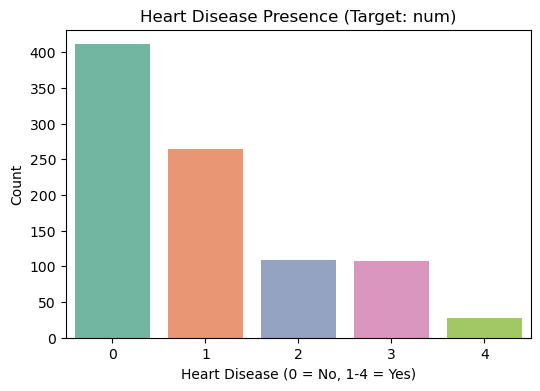

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='num', palette='Set2')
plt.title("Heart Disease Presence (Target: num)")
plt.xlabel("Heart Disease (0 = No, 1-4 = Yes)")
plt.ylabel("Count")
plt.show()


In [15]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


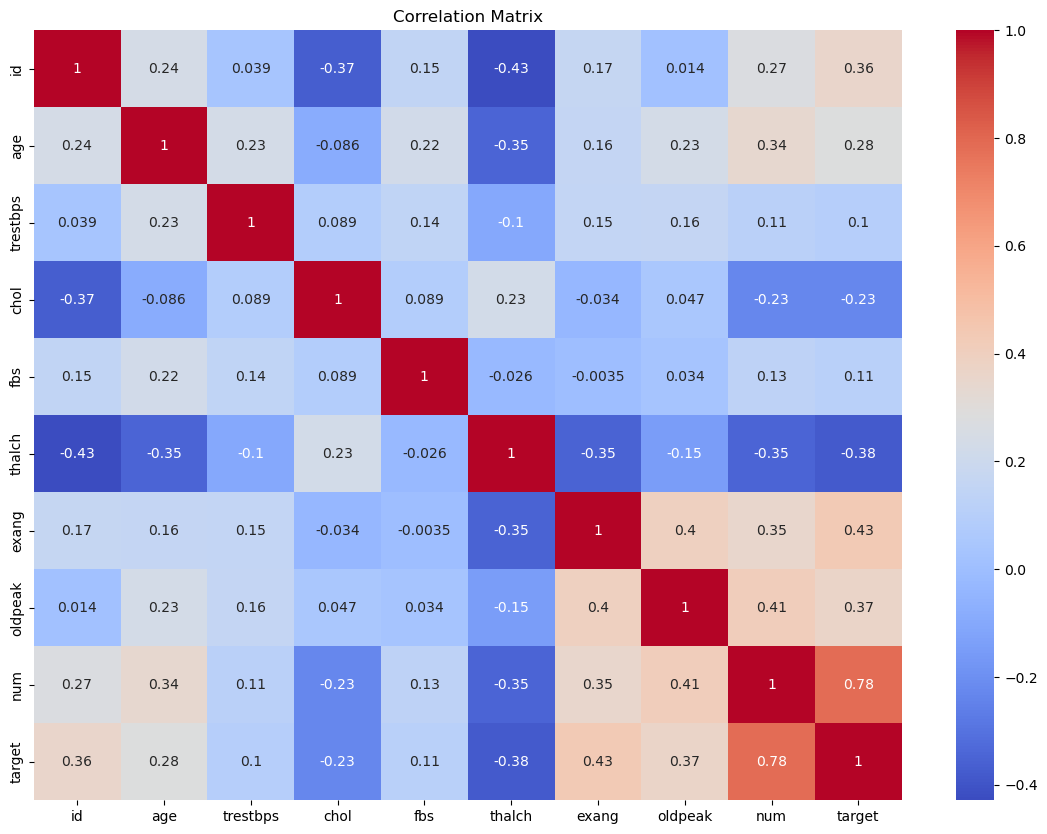

In [16]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


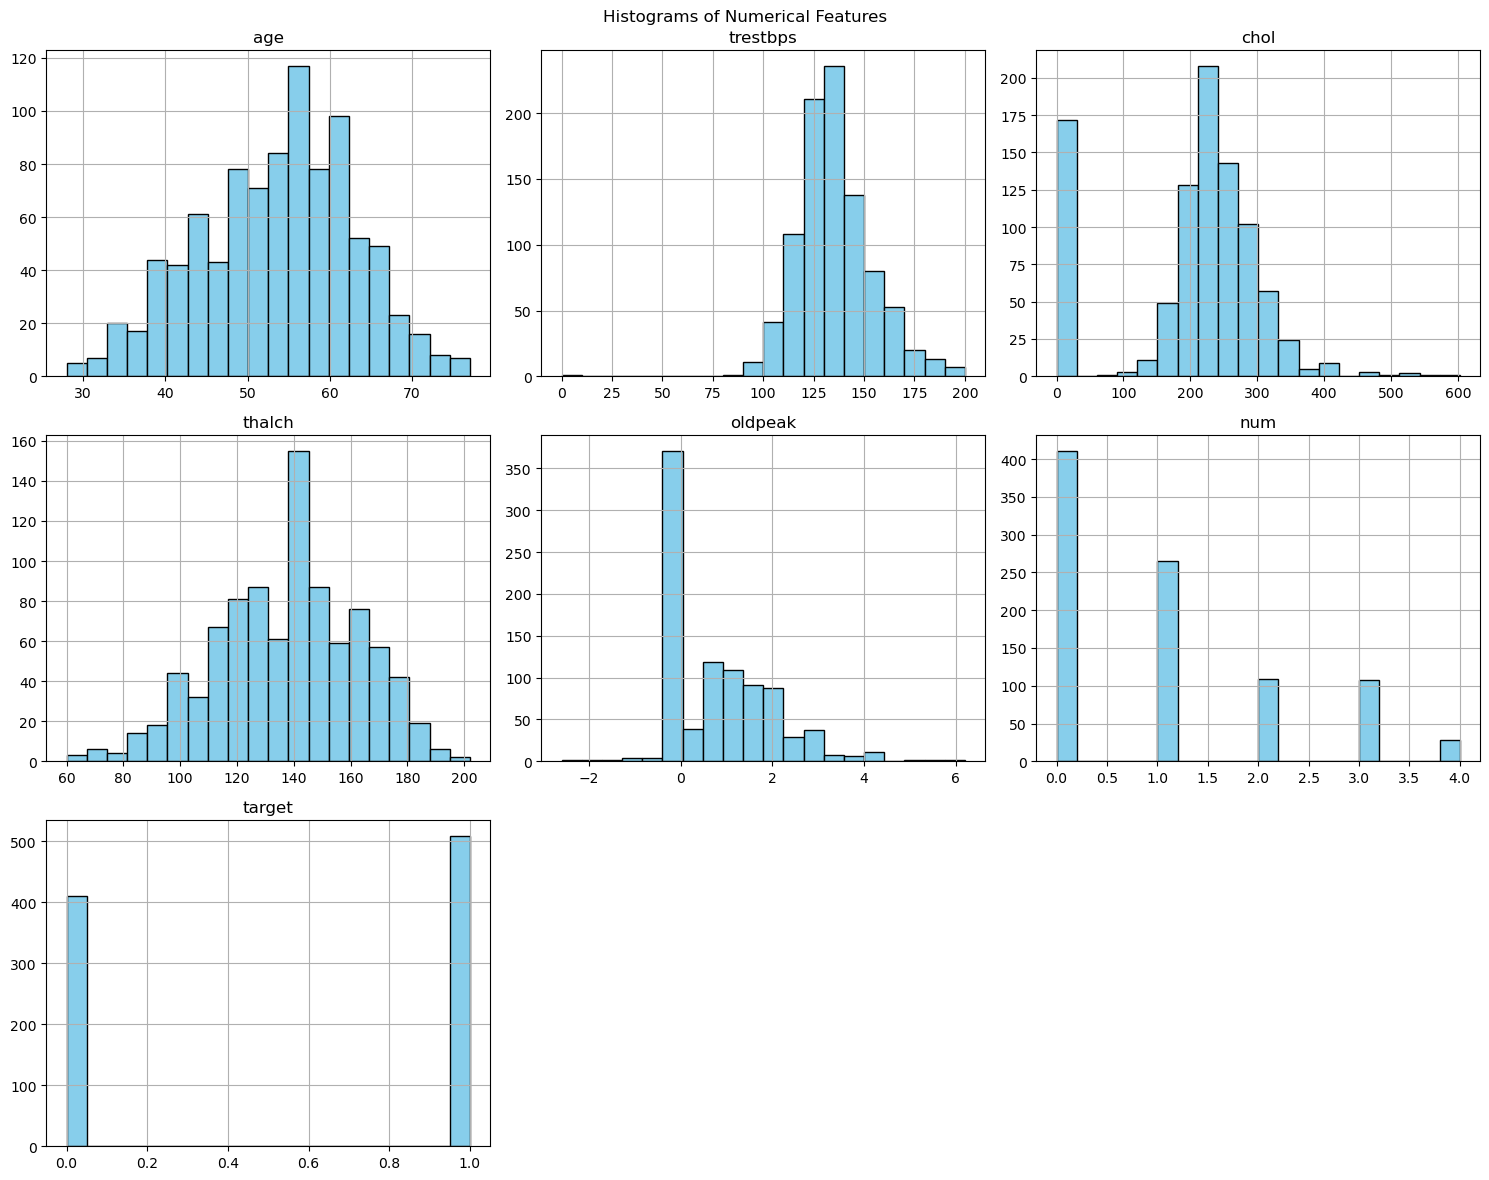

In [22]:
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()


In [18]:
df = df.drop(columns=['id'])


C:\Users\MOD\AppData\Local\Temp\ipykernel_12544\1803625491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=df_melted, palette='Set3')


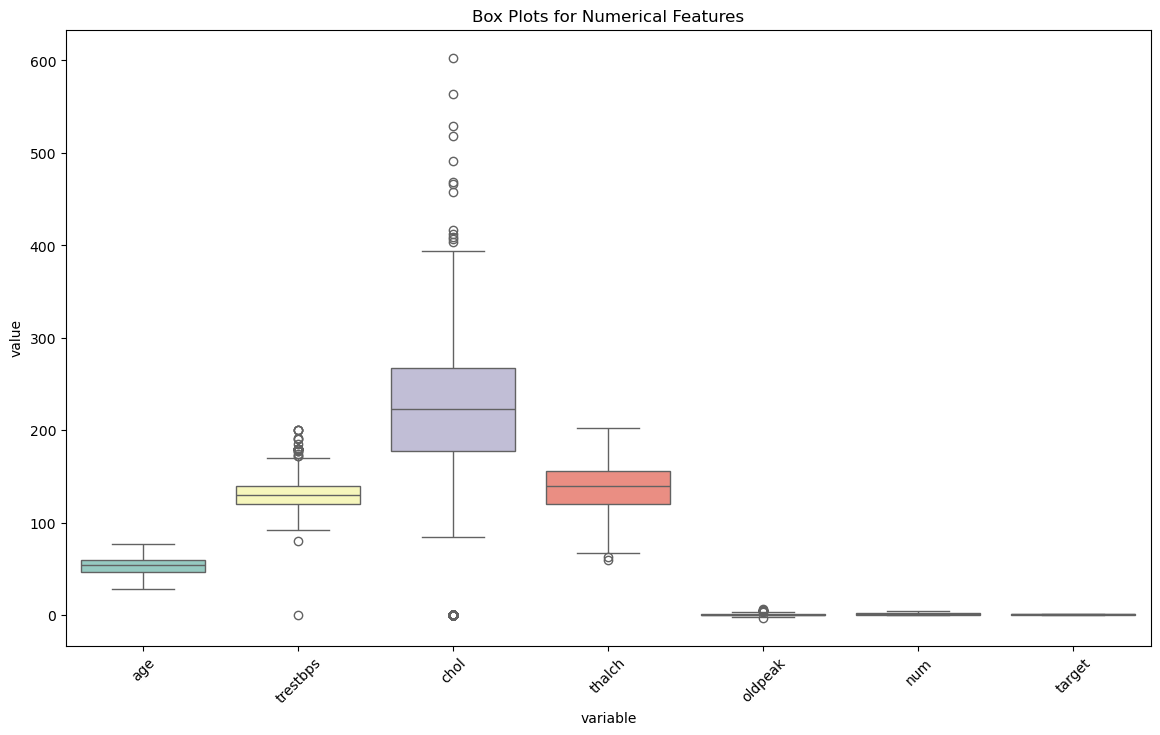

In [23]:
plt.figure(figsize=(14, 8))
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_melted = pd.melt(df_numeric)
sns.boxplot(x='variable', y='value', data=df_melted, palette='Set3')
plt.title("Box Plots for Numerical Features")
plt.xticks(rotation=45)
plt.show()


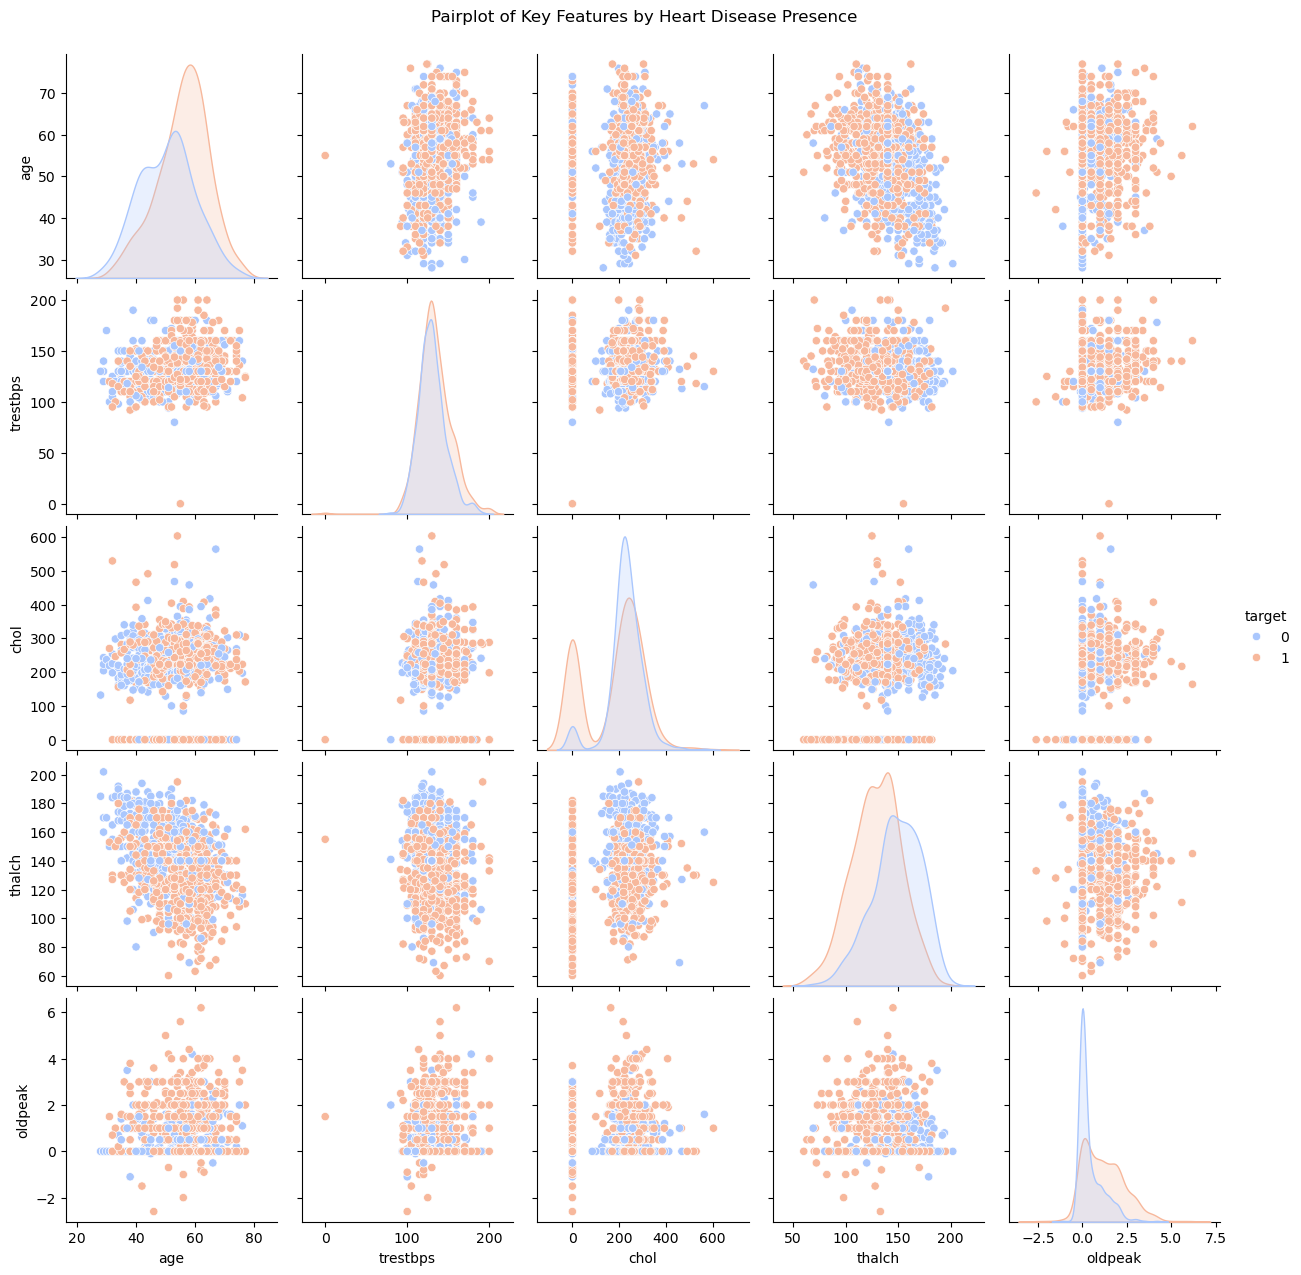

In [24]:
key_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'target']
sns.pairplot(df[key_features], hue='target', palette='coolwarm')
plt.suptitle("Pairplot of Key Features by Heart Disease Presence", y=1.02)
plt.show()


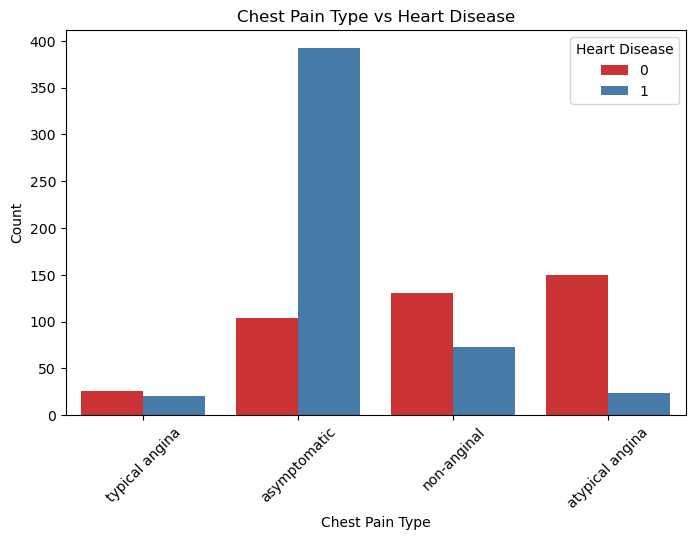

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Heart Disease")
plt.show()


In [26]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [27]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


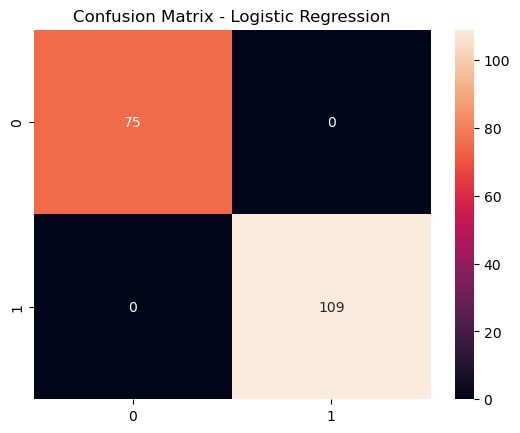

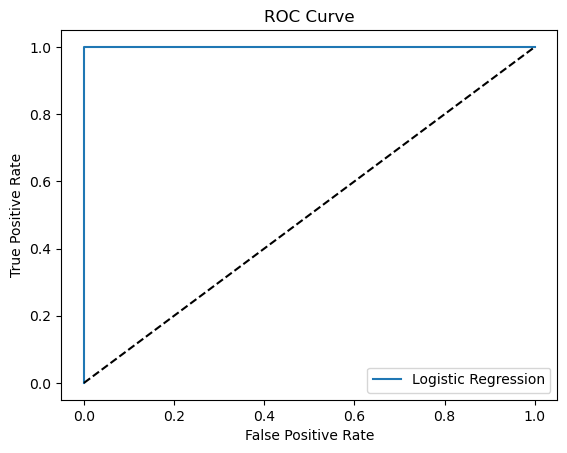

ROC AUC Score (Logistic Regression): 1.0


In [33]:
# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
y_proba = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC Score
print("ROC AUC Score (Logistic Regression):", roc_auc_score(y_test, y_proba))


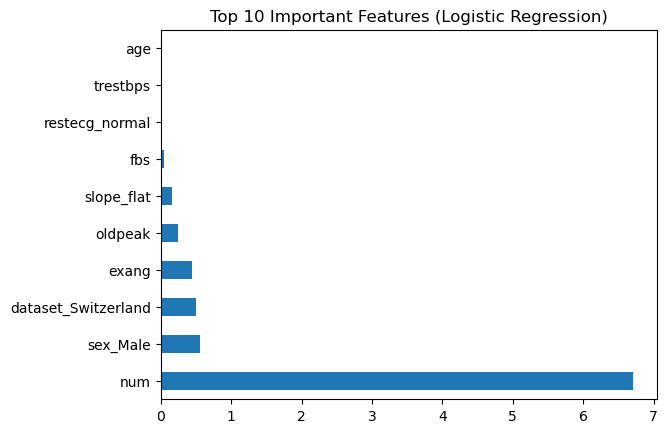

In [34]:
importance = pd.Series(lr_model.coef_[0], index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()


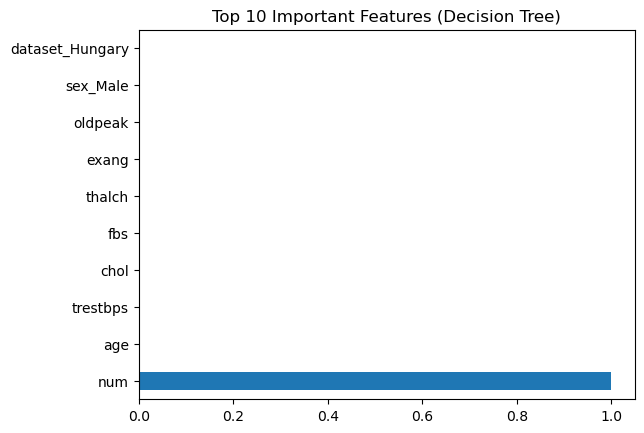

In [35]:
importance = pd.Series(dt_model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()
